# Рекомендательные системы





In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
df_3 = pd.read_json('gdrive/My Drive/Software_5.json.gz', lines=True)

In [ ]:
df_3.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,False,"10 20, 2010",A38NELQT98S4H8,0321719816,{'Format:': ' DVD-ROM'},WB Halper,I've been using Dreamweaver (and it's predeces...,A solid overview of Dreamweaver CS5,1287532800,NaN,NaN
1,4,False,"10 18, 2010",A3QJU4FEN8PQSZ,0321719816,{'Format:': ' DVD-ROM'},Grimmy,"The demo is done with the PC version, with ref...",A good value,1287360000,NaN,NaN
2,5,False,"10 16, 2010",ACJT8MUC0LRF0,0321719816,{'Format:': ' DVD-ROM'},D. Fowler,If you've been wanting to learn how to create ...,This is excellent software for those who want ...,1287187200,3,NaN
3,5,False,"10 12, 2010",AYUF7YETYOLNX,0321719816,{'Format:': ' DVD-ROM'},Bryan Newman,I've been creating websites with Dreamweaver f...,A Fantastic Overview of Dream Weaver and Web D...,1286841600,NaN,NaN
4,5,False,"10 7, 2010",A31ICLWQ9CSHRS,0321719816,{'Format:': ' DVD-ROM'},Al Swanson,I decided (after trying a number of other prod...,Excellent Tutorials!,1286409600,NaN,NaN


reviewerID - ID of the reviewer

asin - ID продукта

reviewerName - name of the reviewer

vote - полезность отзыва

style - носитель

reviewText - текст отзыва

overall - рейтинг продукта

summary - итоговый обзор

unixReviewTime - уникальный индекс времени обзора (unix time)

reviewTime - время обзора (raw)

image - изображения, которые пользователи размещают после того, как они получили продукт

Далее удалю строки, которые по моему мнению лишние.

In [ ]:
df_4=df_3.drop(columns = ['verified', 'style', 'reviewText', 'summary', 'vote', 'image', 'reviewTime','unixReviewTime'],axis = 1)

In [ ]:
df_4.head()

,overall,reviewerID,asin,reviewerName
0,4,A38NELQT98S4H8,0321719816,WB Halper
1,4,A3QJU4FEN8PQSZ,0321719816,Grimmy
2,5,ACJT8MUC0LRF0,0321719816,D. Fowler
3,5,AYUF7YETYOLNX,0321719816,Bryan Newman
4,5,A31ICLWQ9CSHRS,0321719816,Al Swanson


In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   overall       12805 non-null  int64 
 1   reviewerID    12805 non-null  object
 2   asin          12805 non-null  object
 3   reviewerName  12796 non-null  object
dtypes: int64(1), object(3)
memory usage: 400.3+ KB


Как можем видеть имеются пропуски в столбце reviewerName. Удалим строки, содержащие пропуски.

In [ ]:
df_4 = df_4.loc[pd.isnull(df_4.reviewerName) == False]

In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12796 entries, 0 to 12804
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   overall       12796 non-null  int64 
 1   reviewerID    12796 non-null  object
 2   asin          12796 non-null  object
 3   reviewerName  12796 non-null  object
dtypes: int64(1), object(3)
memory usage: 499.8+ KB


Посмотрим на распределение всех величин в датасете.

In [ ]:
df_4.overall.value_counts ()

5    5968
4    3012
3    1597
1    1500
2     719
Name: overall, dtype: int64

Как можем видеть, большинство отзывов положительные

In [ ]:
df_4.reviewerName.value_counts ()

Amazon Customer         257
J. White                 55
Jerry Saperstein         45
A Customer               39
Deimos                   38
                       ... 
Sinfronio Alcachupas      1
genoa golf                1
Nacho Libra               1
Sam Vaknin                1
J. Virzi                  1
Name: reviewerName, Length: 1781, dtype: int64

In [ ]:
df_4.reviewerID.value_counts ()

A225G2TFM76GYX    55
A680RUE1FDO8B     45
A20DZX38KRBIT8    38
AQCJWSMSURQI2     31
A31N0XY2UTB25C    29
                  ..
A34AN3NF8P7PJ      5
A1PPD5TOR6VVYV     4
A2AEZQ3DGBBLPR     4
A1VQHH85U7PX0      2
A3FGJDBSMCSG7G     1
Name: reviewerID, Length: 1826, dtype: int64

In [ ]:
df_4.asin.value_counts ()

B0000AZJY6    452
B000EORV8Q    232
B000050ZRE    230
B0001FS9NE    230
B00EZPXYP4     98
             ... 
B00113N12E      1
B000XIH9R6      1
B000WM1Z46      1
B000VYAL2C      1
B0011SFXCK      1
Name: asin, Length: 802, dtype: int64

Уникальных пользователей 1826, товаров - 802.

Посмотрим средние значения всех рейтингов, связанных с конкретным товаром.

In [ ]:
df_4.groupby(by='asin')['overall'].mean()

asin
0321700945    4.750000
0321719816    4.571429
0321719824    4.222222
0763855553    4.027778
0982697813    4.666667
                ...   
B01F7RJHIQ    4.333333
B01FFVDY9M    4.400000
B01H39M7ME    2.428571
B01HAP3NUG    3.928571
B01HAP47PQ    3.916667
Name: overall, Length: 802, dtype: float64

Отсортируем оценки и посмотрим, у какого товара самая высокая средняя оценка

In [ ]:
df_4.groupby(by='asin')['overall'].mean().sort_values(ascending=False)

asin
B0095C09G4    5.0
B00LYYMXF6    5.0
B00ENFYLRQ    5.0
B0015GKRKG    5.0
B0015CA9VW    5.0
             ... 
B0016PT3BK    1.0
B000VQ7HO0    1.0
B0012RAVRC    1.0
B000VSDNMI    1.0
B0013WO6QS    1.0
Name: overall, Length: 802, dtype: float64

Также будет полезно узнать сколько людей  на самом деле дали оценки конкретному товару.

In [ ]:
df_4.groupby(by='asin')['overall'].count().sort_values(ascending=False)

asin
B0000AZJY6    452
B000EORV8Q    232
B000050ZRE    230
B0001FS9NE    230
B00EZPXYP4     98
             ... 
B0011SFXCK      1
B00149YSUY      1
B0012KW3KM      1
B00132DENO      1
B0015CA9VW      1
Name: overall, Length: 802, dtype: int64

Это нужно, чтобы понять следующее:
B0015CA9VW казалось, имеет самый высокий средний рейтинг, но при этом его оценил только 1 пользователь!

Создадим датафрейм и построим совместный график, чтобы узнать взаимосвязь между средним рейтингом и количеством людей, которые его оценили.

In [ ]:
New_data=pd.DataFrame(df_4.groupby(by='asin')['overall'].mean())

In [ ]:
New_data.head()

,overall
asin,
0321700945,4.750000
0321719816,4.571429
0321719824,4.222222
0763855553,4.027778
0982697813,4.666667


Также добавим количество оценок в датафрейм вместе со средними оценками.

In [ ]:
New_data['No. of people Rated']=df_4.groupby(by='asin')['overall'].count()

In [ ]:
New_data.head()

,overall,No. of people Rated
asin,,
0321700945,4.750000,8
0321719816,4.571429,14
0321719824,4.222222,9
0763855553,4.027778,36
0982697813,4.666667,9


In [ ]:
New_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0321700945 to B01HAP47PQ
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   overall              802 non-null    float64
 1   No. of people Rated  802 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 18.8+ KB


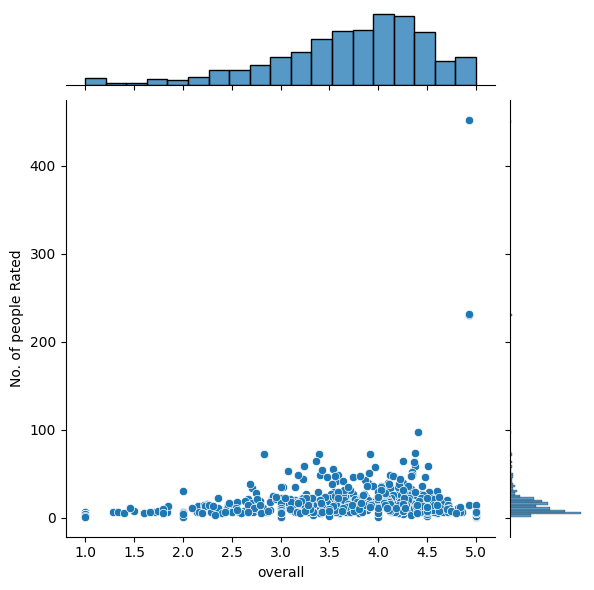

In [ ]:
import seaborn as sns
sns.jointplot(x=New_data['overall'],y=New_data['No. of people Rated']);

Это ясно показывает, что фильмы с рейтингом от 3 до 4,5 имеют наибольшее количество оценок. Фильмы с рейтингом почти 5 звезд имеют мало оценок.  Построим график плотности.

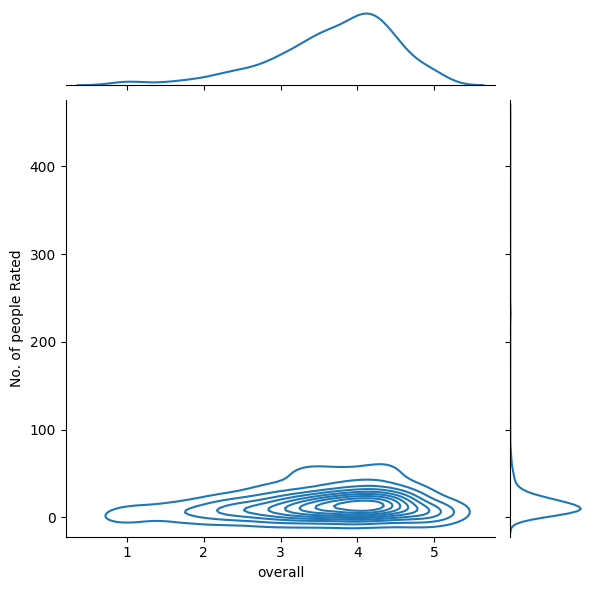

In [ ]:
sns.jointplot(x=New_data['overall'],y=New_data['No. of people Rated'],kind='kde');

Посмотрим отдельные распределения функций.

<ipython-input-23-318f270e76de>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(New_data['overall']);


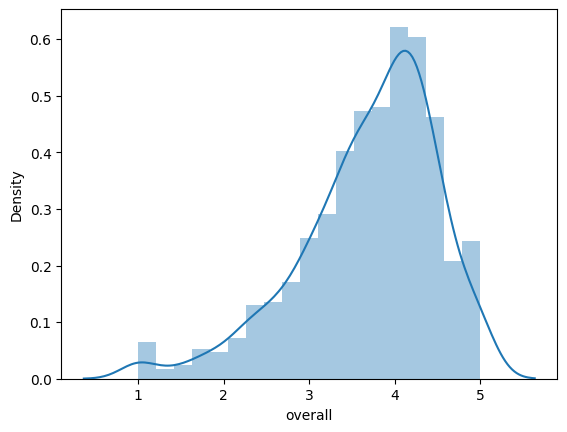

In [ ]:
sns.distplot(New_data['overall']);

С натяжкой это можно назвать нормальным распределение с некоторым отрицательным перекосом.

In [ ]:
# product = df_4[['asin']].drop_duplicates()
# product['asin'] = product.asin.astype(str)

In [ ]:
# product.info()

In [ ]:
# product.head()

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3097779 sha256=438c51391a51d7315ec9dd52fdad1e688ae04beafb9dd9b29af8463c88cdd3ac
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, accuracy, SVD, Reader
from surprise.model_selection import train_test_split

In [ ]:
New_data.reset_index(inplace=True)

In [ ]:
New_data.head()

,asin,overall,No. of people Rated
0,0321700945,4.750000,8
1,0321719816,4.571429,14
2,0321719824,4.222222,9
3,0763855553,4.027778,36
4,0982697813,4.666667,9


In [ ]:
reader = Reader(line_format = 'user item rating', rating_scale=(1,5))
data = Dataset.load_from_df(New_data [['asin', 'overall', 'No. of people Rated']], reader)

In [ ]:
# reader = Reader(line_format = 'user item rating', rating_scale=(1,5))
# data = Dataset.load_from_df(df_4 [['reviewerID', 'asin', 'overall']], reader)

In [ ]:
from surprise import accuracy, Dataset, SVD
from surprise.model_selection import train_test_split

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=0.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 35.9197
MAE:  12.9502


12.950248756218905

In [ ]:
# Run 5-fold cross-validation and print results.
from surprise.model_selection import cross_validate
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    14.2918 13.7635 24.0013 38.9040 29.6830 24.1287 9.5224  
MAE (testset)     9.9068  9.0248  11.5750 13.5437 12.8812 11.3863 1.7141  
Fit time          0.02    0.01    0.01    0.01    0.01    0.01    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([14.2917689 , 13.76353089, 24.00130205, 38.90396831, 29.68301282]),
 'test_mae': array([ 9.9068323 ,  9.02484472, 11.575     , 13.54375   , 12.88125   ]),
 'fit_time': (0.016904354095458984,
  0.009199380874633789,
  0.009740591049194336,
  0.009848356246948242,
  0.009913444519042969),
 'test_time': (0.0007638931274414062,
  0.0007529258728027344,
  0.0007762908935546875,
  0.0007419586181640625,
  0.0007166862487792969)}

Выводы: как можем видеть, после проведения eda и создания "правильного" с точки зрения анализа датасета, использую svd алгоритм библиотеки surprise, можно получить неплохие результаты работы рекомендательной системы "из коробки" (RMSE: 35.9197, MAE:  12.9502). Его можно улучшить, например, используя также встроенную в библиотеку кросс-валидацию.
Выводить рекомендации, полученные с помощью алгоритма на данном датасете не вижу особого смысла, так как в датасете отсутсвует описание товаров и субъективно оценить работу svd мы не сможем.


